In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import folium

In [2]:
lis = pd.read_csv('listings.csv')

In [3]:
lis.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
columns_to_keep = ['last_scraped','name','host_id','host_name','host_location','neighbourhood','neighbourhood_group_cleansed','city','state','market','smart_location','country','latitude','longitude','property_type','room_type','bathrooms','bedrooms','beds','bed_type','price','weekly_price','monthly_price','security_deposit','cleaning_fee','minimum_nights','maximum_nights','availability_365','number_of_reviews','review_scores_location','calculated_host_listings_count','reviews_per_month']
lis = lis[columns_to_keep]

In [5]:
lis.fillna({'host_name':'absent','host_location':'Not Specified','neighbourhood':'Not Specified','neighbourhood_group_cleansed':'Not Specified','property_type':'Other','weekly_price':'0','monthly_price':'0','security_deposit':'0','cleaning_fee':'0'}, inplace=True)


In [6]:
lis.fillna({'bathrooms':lis['bathrooms'].mean(),'bedrooms':lis['bedrooms'].mean(),'beds':lis['beds'].mean(),'reviews_per_month':0,'review_scores_location':lis['review_scores_location'].mean()},inplace=True)

In [7]:
# changing DataTypes of some columns for better Analysis.

lis['last_scraped'] = pd.to_datetime(lis['last_scraped'])

lis['price'] = lis['price'].str.replace('[^\d.]', '', regex=True)
lis['price'] = pd.to_numeric(lis['price'], errors='coerce')
lis['price'] = lis['price'].astype('Int64')

lis['weekly_price'] = lis['weekly_price'].str.replace('[^\d.]', '', regex=True)
lis['weekly_price'] = pd.to_numeric(lis['weekly_price'], errors='coerce')
lis['weekly_price'] = lis['weekly_price'].astype('Int64')

lis['monthly_price'] = lis['monthly_price'].str.replace('[^\d.]', '', regex=True)
lis['monthly_price'] = pd.to_numeric(lis['monthly_price'], errors='coerce')
lis['monthly_price'] = lis['monthly_price'].astype('Int64')

lis['security_deposit'] = lis['security_deposit'].str.replace('[^\d.]', '', regex=True)
lis['security_deposit'] = pd.to_numeric(lis['security_deposit'], errors='coerce')
lis['security_deposit'] = lis['security_deposit'].astype('Int64')

lis['cleaning_fee'] = lis['cleaning_fee'].str.replace('[^\d.]', '', regex=True)
lis['cleaning_fee'] = pd.to_numeric(lis['cleaning_fee'], errors='coerce')
lis['cleaning_fee'] = lis['cleaning_fee'].astype('Int64')


<Axes: >

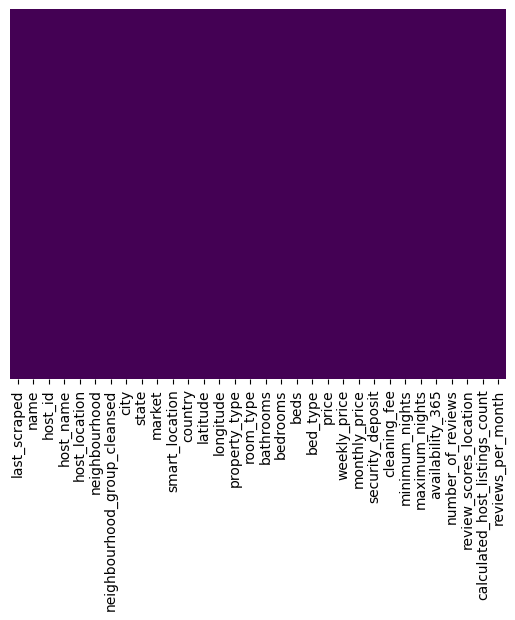

In [8]:
sns.heatmap(lis.isnull(),yticklabels=False,cbar=False,cmap='viridis')

C:\Users\Zia Saab\AppData\Local\Temp\ipykernel_11044\3708687180.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  subplot(2,3,1)
C:\Users\Zia Saab\AppData\Local\Temp\ipykernel_11044\3708687180.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lis['price'])
C:\Users\Zia Saab\AppData\Local\Temp\ipykernel_11044\3708687180.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility)

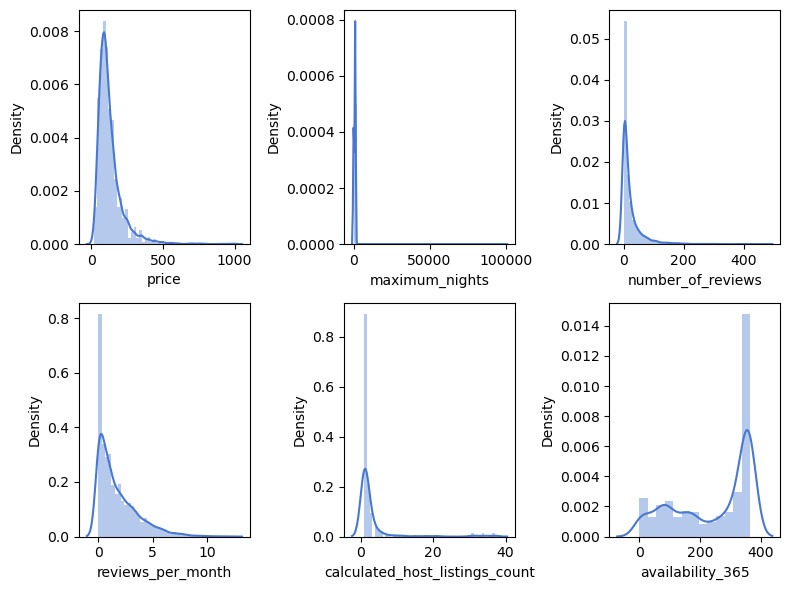

In [9]:
sns.set_palette('muted')
from pylab import *
f, ax = plt.subplots(figsize=(8,6))

subplot(2,3,1)
sns.distplot(lis['price'])

subplot(2,3,2)
sns.distplot(lis['maximum_nights'])

subplot(2,3,3)
sns.distplot(lis['number_of_reviews'])

subplot(2,3,4)
sns.distplot(lis['reviews_per_month'])

subplot(2,3,5)
sns.distplot(lis['calculated_host_listings_count'])

subplot(2,3,6)
sns.distplot(lis['availability_365'])

plt.tight_layout()
plt.draw()

C:\Users\Zia Saab\AppData\Local\Temp\ipykernel_11044\2433873566.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  subplot(2,3,1)


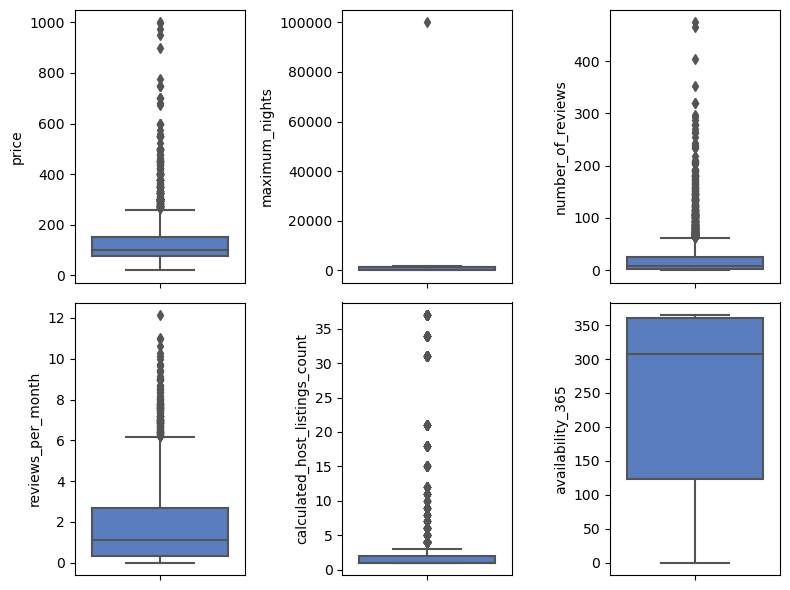

In [10]:
sns.set_palette('muted')
from pylab import *
f, ax = plt.subplots(figsize=(8,6))

subplot(2,3,1)
sns.boxplot(y = lis['price'])

subplot(2,3,2)
sns.boxplot(y = lis['maximum_nights'])

subplot(2,3,3)
sns.boxplot(y = lis['number_of_reviews'])

subplot(2,3,4)
sns.boxplot(y = lis['reviews_per_month'])

subplot(2,3,5)
sns.boxplot(y = lis['calculated_host_listings_count'])

subplot(2,3,6)
sns.boxplot(y = lis['availability_365'])

plt.tight_layout()
plt.draw()

In [11]:
lis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   last_scraped                    3818 non-null   datetime64[ns]
 1   name                            3818 non-null   object        
 2   host_id                         3818 non-null   int64         
 3   host_name                       3818 non-null   object        
 4   host_location                   3818 non-null   object        
 5   neighbourhood                   3818 non-null   object        
 6   neighbourhood_group_cleansed    3818 non-null   object        
 7   city                            3818 non-null   object        
 8   state                           3818 non-null   object        
 9   market                          3818 non-null   object        
 10  smart_location                  3818 non-null   object        
 11  coun

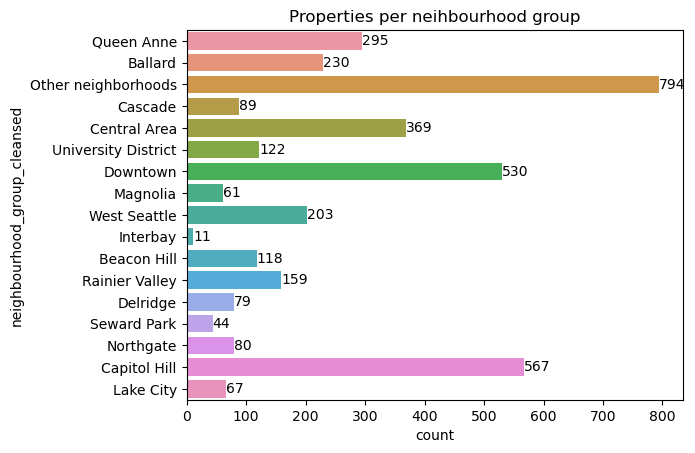

In [12]:
plt.title("Properties per neihbourhood group")
ax = sns.countplot(data=lis,y='neighbourhood_group_cleansed')
for bars in ax.containers:
    ax.bar_label(bars)

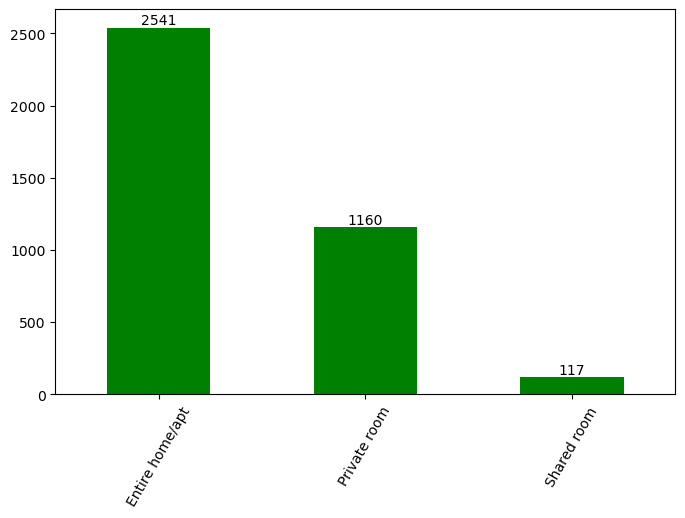

In [13]:
ax = lis['room_type'].value_counts().plot(kind='bar',color='green',figsize=(8,5))
plt.xticks(rotation=60)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

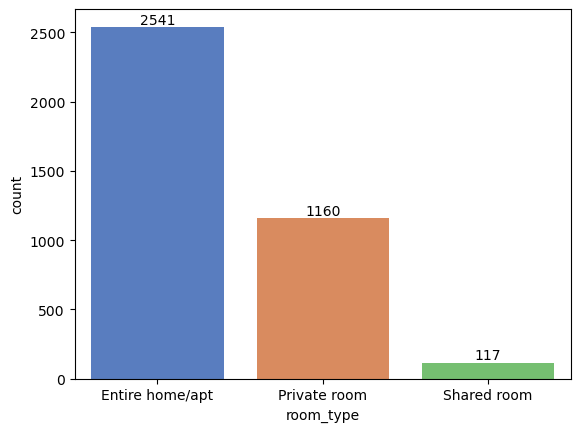

In [14]:
ax = sns.countplot(x='room_type',data=lis)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

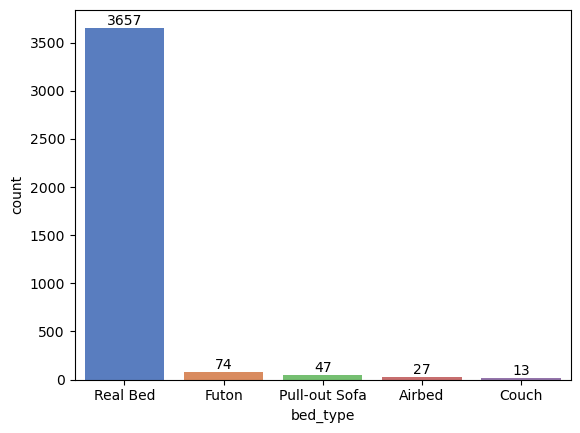

In [15]:
ax = sns.countplot(x='bed_type',data=lis)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [16]:
renting_purpose = lis[(lis['availability_365'] == 365) & (lis['room_type'] == 'Entire home/apt')]
renting_purpose.head()

,last_scraped,name,host_id,host_name,host_location,neighbourhood,neighbourhood_group_cleansed,city,state,market,...,monthly_price,security_deposit,cleaning_fee,minimum_nights,maximum_nights,availability_365,number_of_reviews,review_scores_location,calculated_host_listings_count,reviews_per_month
4,2016-01-04,Charming craftsman 3 bdm house,1452570,Emily,"Seattle, Washington, United States",Queen Anne,Queen Anne,Seattle,WA,Seattle,...,0,700,125,1,1125,365,38,9.000000,1,0.89
58,2016-01-04,Beautiful West Queen Anne Craftsman,23669617,Irmela,"Seattle, Washington, United States",Queen Anne,Queen Anne,Seattle,WA,Seattle,...,7500,750,120,2,1125,365,0,9.608916,1,0.00
91,2016-01-04,Chic 3 bed 4 bath Ballard townhome,2034501,Vivian,"Seattle, Washington, United States",Ballard,Ballard,Seattle,WA,Seattle,...,4200,750,300,14,60,365,0,9.608916,1,0.00
95,2016-01-04,Modern family home in Old Ballard,205007,Martin And Taryn,"Seattle, Washington, United States",Ballard,Ballard,Seattle,WA,Seattle,...,0,0,75,2,10,365,10,10.000000,1,0.64
114,2016-01-04,Classic old Ballard home,23489864,Daniel,"Seattle, Washington, United States",Ballard,Ballard,Seattle,WA,Seattle,...,0,0,150,5,1125,365,1,10.000000,1,1.00


In [17]:
renting_purpose['neighbourhood_group_cleansed'].value_counts()

Other neighborhoods    63
Capitol Hill           53
Downtown               42
Central Area           42
University District    31
Queen Anne             17
West Seattle           16
Magnolia               13
Beacon Hill            12
Ballard                11
Seward Park             9
Cascade                 6
Rainier Valley          4
Delridge                4
Northgate               4
Lake City               3
Interbay                2
Name: neighbourhood_group_cleansed, dtype: int64

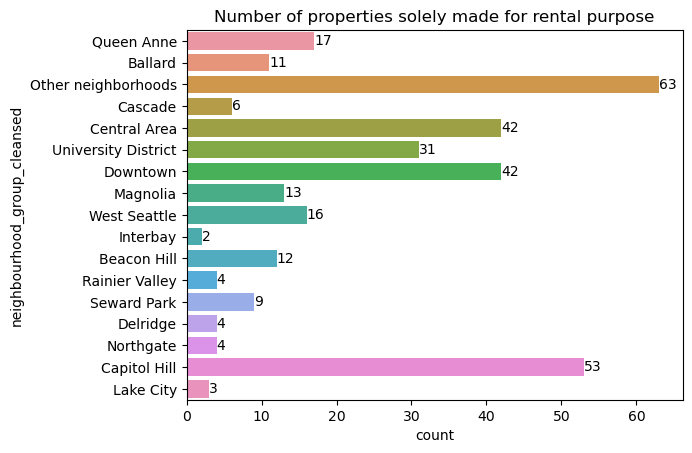

In [18]:
ax = sns.countplot(data=renting_purpose,y='neighbourhood_group_cleansed')
plt.title('Number of properties solely made for rental purpose')
for bars in ax.containers:
    ax.bar_label(bars)

In [19]:
listing_count = lis['name'].value_counts()[:5].reset_index()
listing_count.rename(columns={'index':'Listing on AirBnb','name':'Total Listings'},inplace=True)
listing_count

,Listing on AirBnb,Total Listings
0,Capitol Hill Apartment,3
1,Luxury Apt/Downtown West Seattle,2
2,comfy room&convenient location（中英）,2
3,Capitol Hill Studio Apartment,2
4,Secluded Setting in North Seattle,2


D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33521 (\N{CJK UNIFIED IDEOGRAPH-82F1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


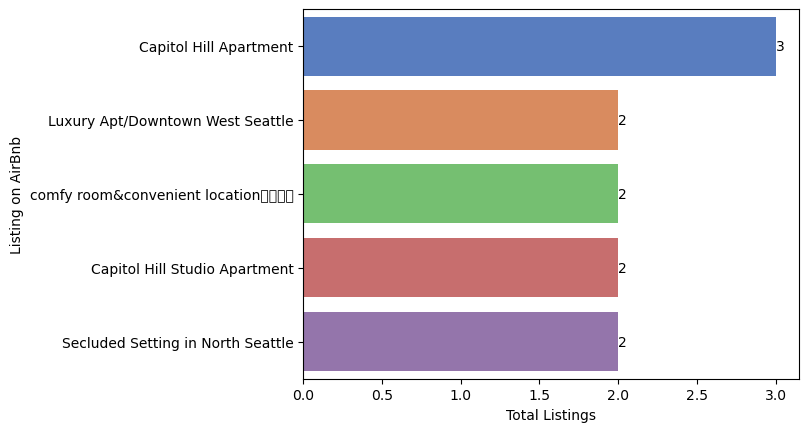

In [20]:
ax = sns.barplot(y='Listing on AirBnb',x=('Total Listings'),data=listing_count)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [21]:
top_10_hosts = lis['host_name'].value_counts()[:10]
top_10_hosts

Andrew                56
Jordan                48
Daniela               47
Michael               46
Melissa               45
Sea To Sky Rentals    36
Eric                  33
Darik                 33
Chris                 33
Lisa                  31
Name: host_name, dtype: int64

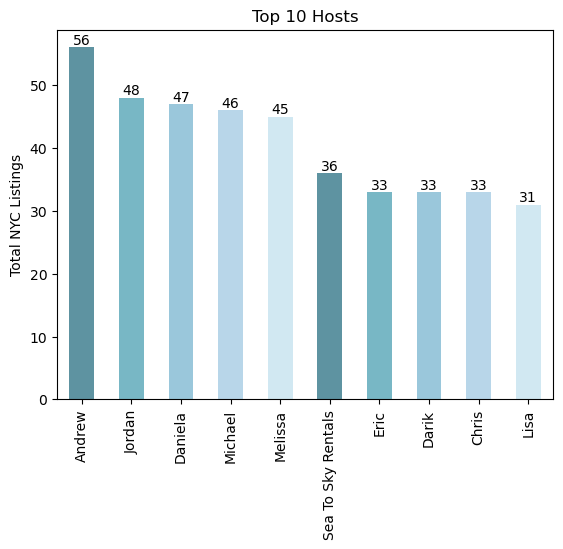

In [22]:
ax = top_10_hosts.plot(kind='bar',color=["#5E93A1", "#78B7C5", "#9AC7DB", "#B8D6E9", "#D1E8F2"])
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.title('Top 10 Hosts')  
plt.ylabel('Total NYC Listings')
plt.show()

In [23]:
lis['neighbourhood'].unique()

array(['Queen Anne', 'Not Specified', 'Ballard', 'Phinney Ridge',
       'Fremont', 'Lower Queen Anne', 'Westlake', 'Wallingford',
       'Green Lake', 'Minor', 'Madrona', 'Harrison/Denny-Blaine',
       'Leschi', 'University District', 'Roosevelt', 'Madison Park',
       'Capitol Hill', 'Atlantic', 'North Beacon Hill',
       'Central Business District', 'Pike Place Market', 'Pike Market',
       'Eastlake', 'Portage Bay', 'South Lake Union', 'Magnolia',
       'Belltown', 'International District', 'Yesler Terrace',
       'First Hill', 'Pioneer Square', 'Gatewood', 'The Junction',
       'Arbor Heights', 'Alki', 'North Admiral', 'Crown Hill', 'Genesee',
       'Fairmount Park', 'Interbay', 'Industrial District', 'Holly Park',
       'South Beacon Hill', 'Greenwood', 'Bitter Lake', 'Fauntleroy',
       'Mount Baker', 'Columbia City', 'Seward Park', 'Brighton',
       'South Delridge', 'Highland Park', 'High Point', 'View Ridge',
       'Windermere', 'Dunlap', 'Rainier Beach', 'North D

In [24]:
nhbr_hstId = lis.groupby(['neighbourhood'])['host_id'].count().nlargest(10)
nhbr_hstId

neighbourhood
Not Specified          416
Capitol Hill           351
Ballard                213
Belltown               204
Minor                  192
Queen Anne             187
Fremont                148
Wallingford            143
University District    107
First Hill             105
Name: host_id, dtype: int64

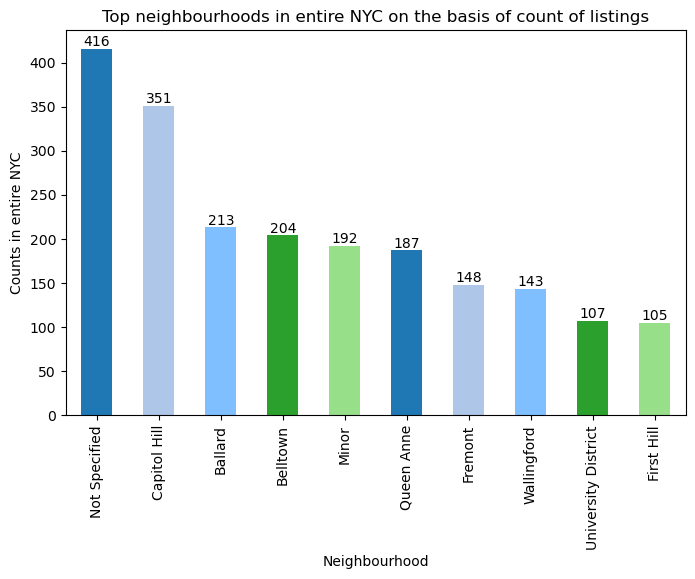

In [25]:
top_10_neighb = lis['neighbourhood'].value_counts()[:10]
ax = top_10_neighb.plot(kind='bar',color=["#1f77b4", "#aec7e8", "#7fbfff", "#2ca02c", "#98df8a"],figsize=(8,5))
plt.xlabel('Neighbourhood')
plt.ylabel('Counts in entire NYC')
plt.title('Top neighbourhoods in entire NYC on the basis of count of listings')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

Text(0.5, 0, 'Room counts')

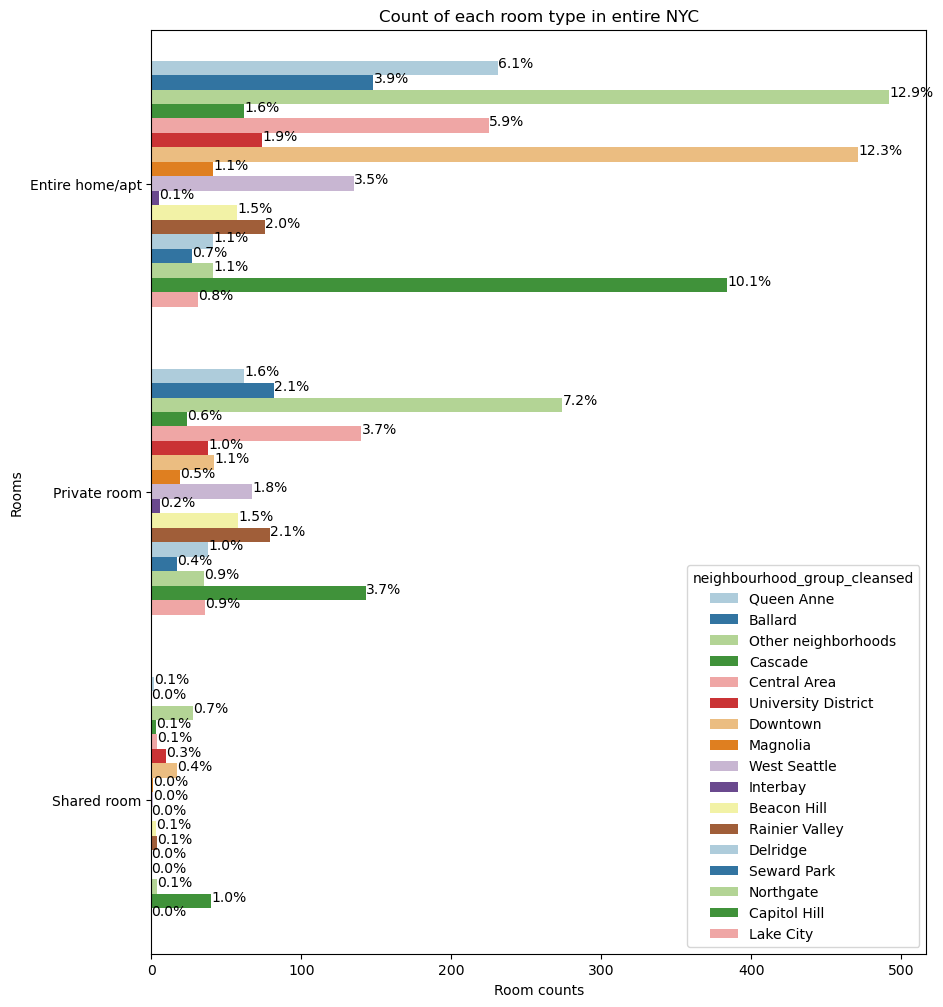

In [26]:
plt.rcParams['figure.figsize']=(10,12)
ax = sns.countplot(y='room_type',hue='neighbourhood_group_cleansed',data=lis,palette='Paired')
total = len(lis['room_type'])
for p in ax.patches:
    per = '{:.1f}%'.format(100*p.get_width()/total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height()/2
    ax.annotate(per,(x,y))
    
plt.title('Count of each room type in entire NYC')
plt.ylabel('Rooms')
plt.xlabel('Room counts')

In [27]:
areas_reviews = lis.groupby(['neighbourhood_group_cleansed'])['number_of_reviews'].max().reset_index().sort_values(by='number_of_reviews',ascending=False)
areas_reviews = areas_reviews.head(10)

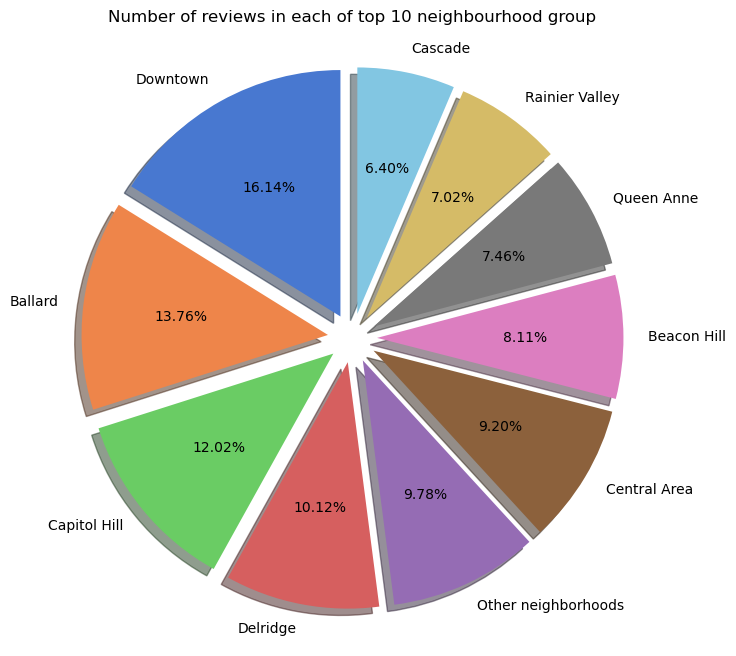

In [28]:
plt.rcParams['figure.figsize'] = (13,8)
reviews = areas_reviews['number_of_reviews']
plt.pie(reviews,labels=areas_reviews['neighbourhood_group_cleansed'],autopct='%0.2f%%',startangle=90,explode=[0.1]*10,shadow=True)
plt.title('Number of reviews in each of top 10 neighbourhood group')
plt.show()

C:\Users\Zia Saab\AppData\Local\Temp\ipykernel_11044\3583383162.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(lis.corr(),square=True,cmap='coolwarm')


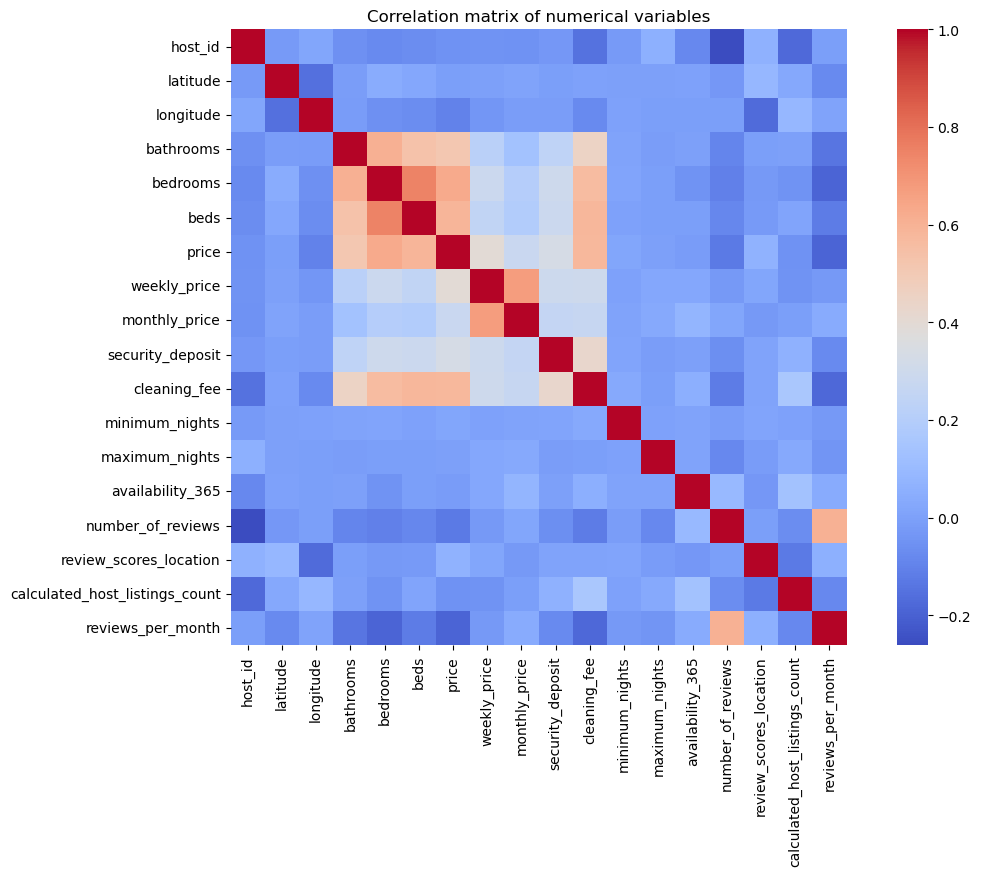

In [29]:
sns.heatmap(lis.corr(),square=True,cmap='coolwarm')
plt.title('Correlation matrix of numerical variables')
plt.show()


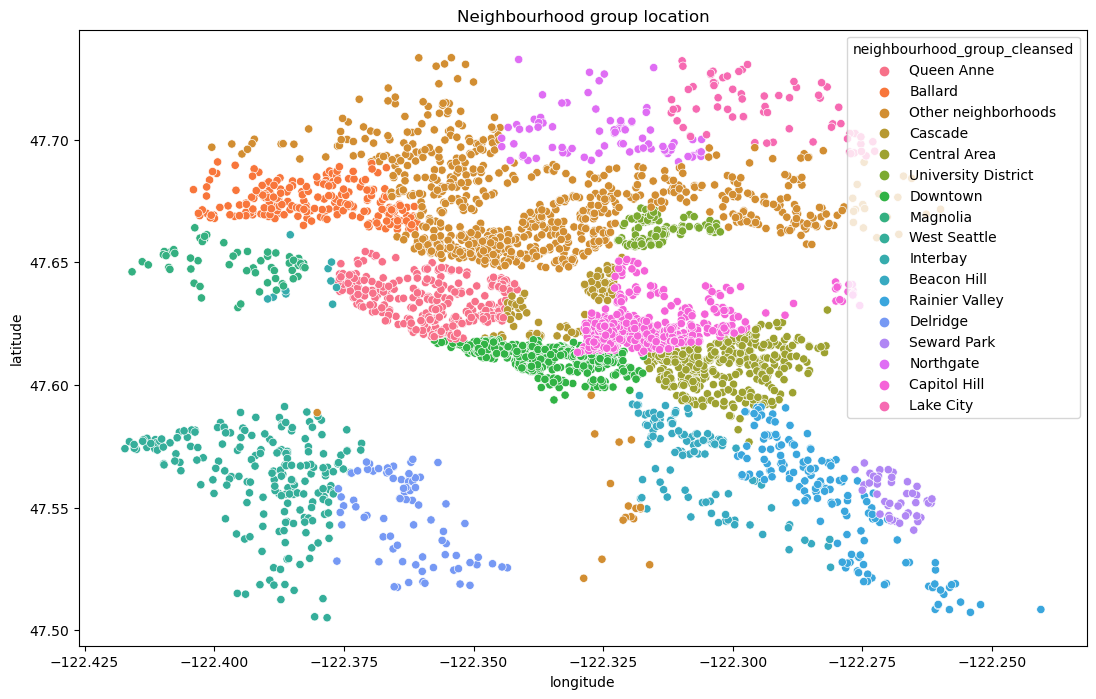

In [30]:
sns.scatterplot(data=lis,x='longitude',y='latitude',hue='neighbourhood_group_cleansed')
plt.title('Neighbourhood group location')
plt.show()

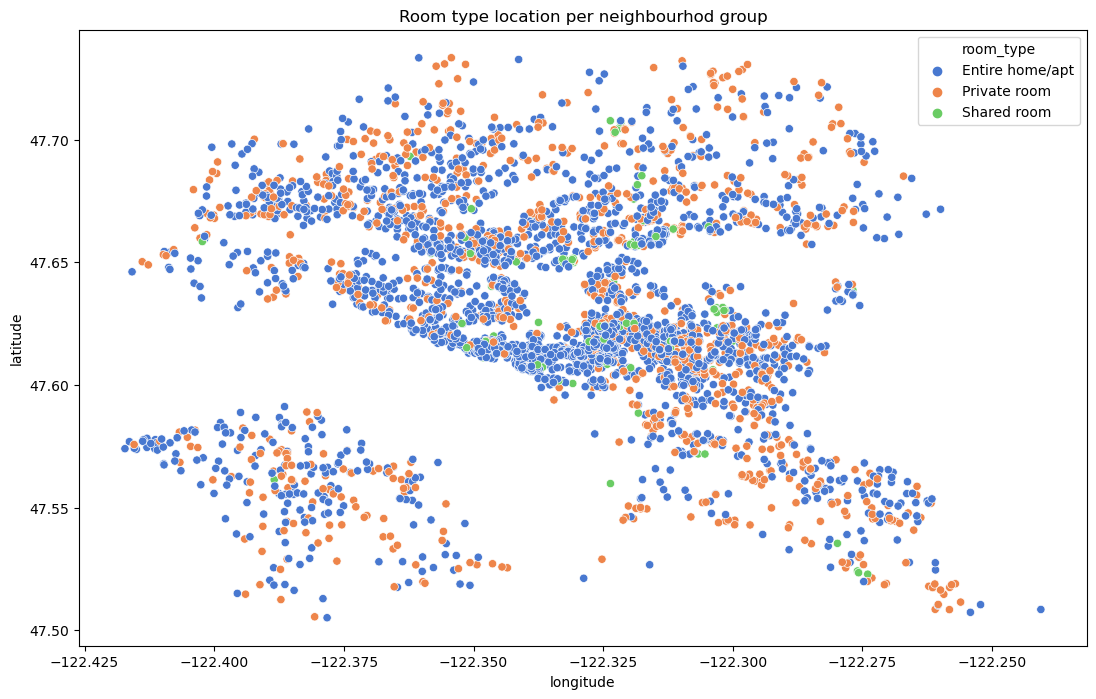

In [31]:
sns.scatterplot(data=lis,x='longitude',y='latitude',hue='room_type')
plt.title('Room type location per neighbourhod group')
plt.show()

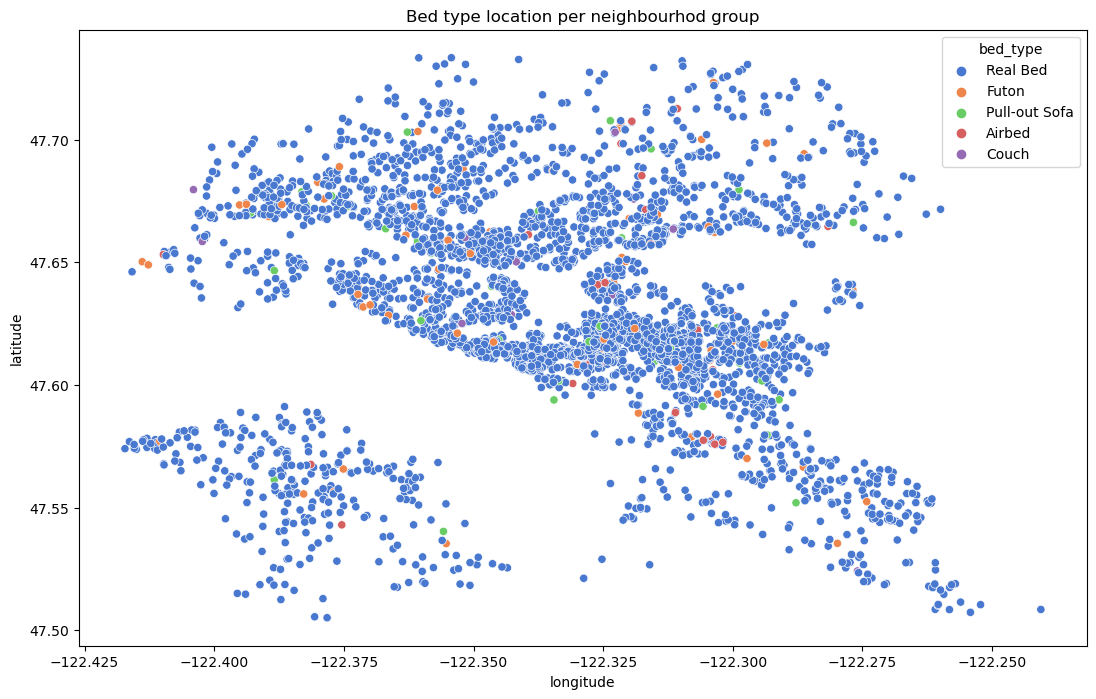

In [32]:
sns.scatterplot(data=lis,x='longitude',y='latitude',hue='bed_type')
plt.title('Bed type location per neighbourhod group')
plt.show()

Text(0.5, 1.0, 'Price per Neighbourhood Group')

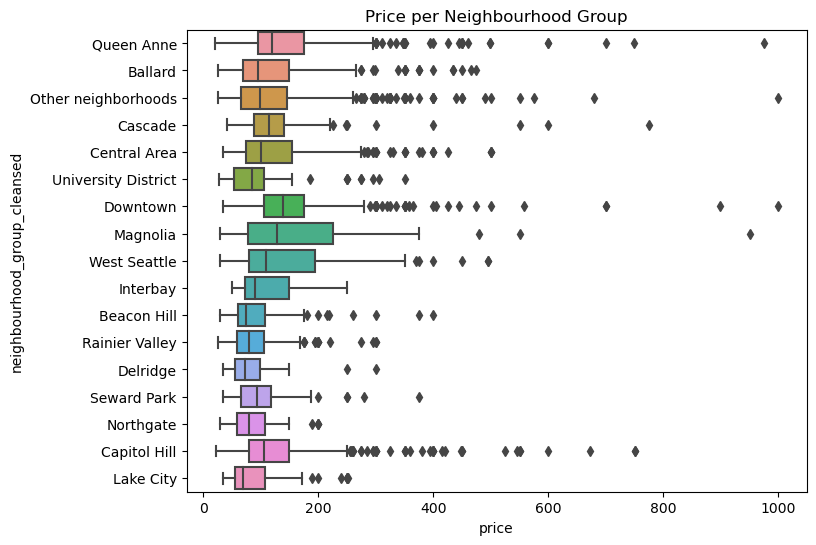

In [34]:
sns.scatterplot(data=lis,x='longitude',y='latitude',hue='bed_type')
plt.title('Bed type location per neighbourhod group')
plt.show()

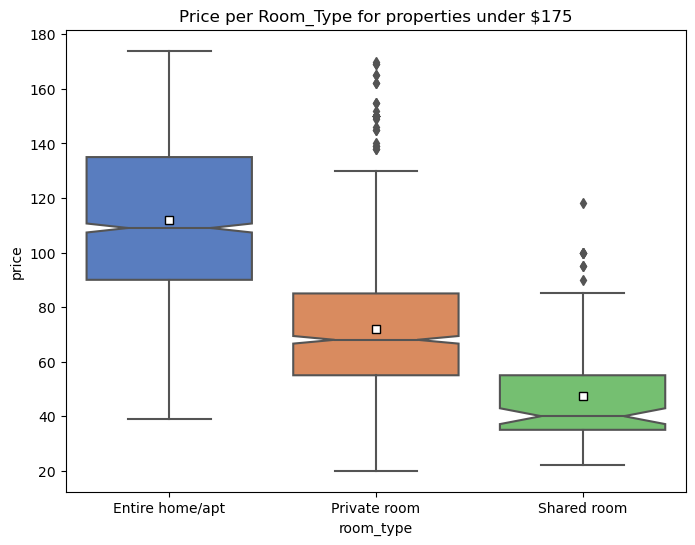

In [41]:
data_filt = lis.loc[lis['price'] < 175]
f, ax = plt.subplots(figsize=(8,6))
sns.boxplot(data=data_filt,x='room_type',y='price',notch=True,showmeans=True,meanprops={"marker":"s","markerfacecolor":"white","markeredgecolor":"black"})
plt.title("Price per Room_Type for properties under $175")
plt.show()

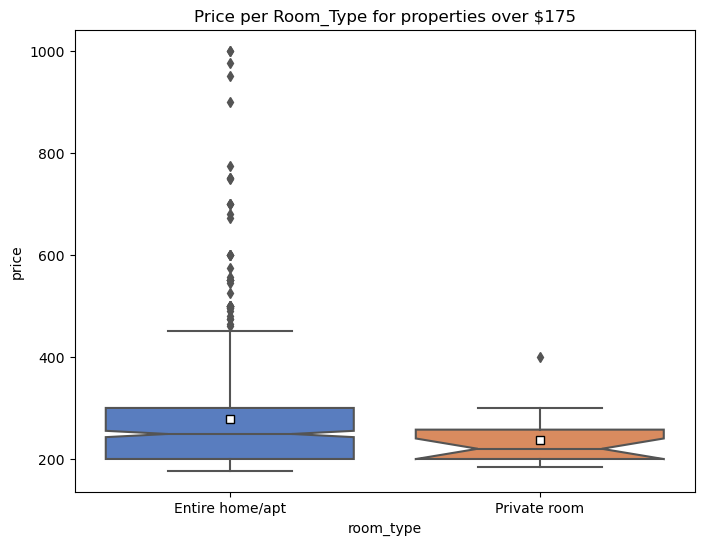

In [40]:
data_filt = lis.loc[lis['price'] > 175]
f, ax = plt.subplots(figsize=(8,6))
sns.boxplot(data=data_filt,x='room_type',y='price',notch=True,showmeans=True,meanprops={"marker":"s","markerfacecolor":"white","markeredgecolor":"black"})
plt.title("Price per Room_Type for properties over $175")
plt.show()

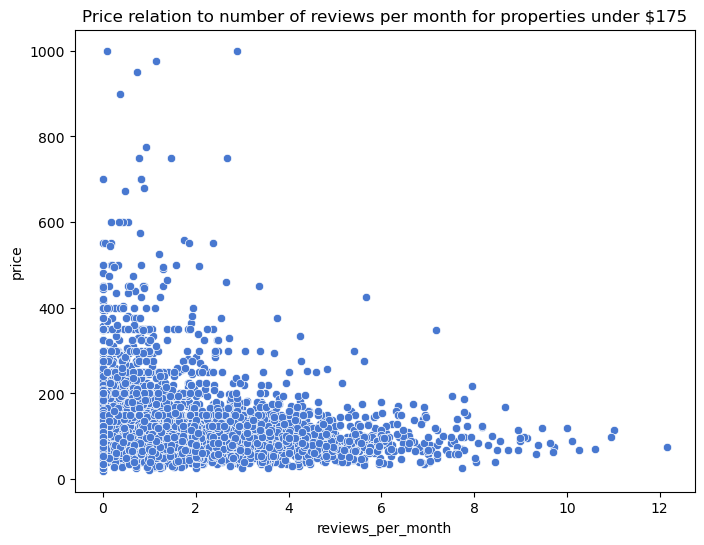

In [42]:
data_filt = lis.loc[(lis['price'] < 175) & lis['reviews_per_month'] < 30 ]
f, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=data_filt,x='reviews_per_month',y='price')
plt.title('Price relation to number of reviews per month for properties under $175')
plt.show()

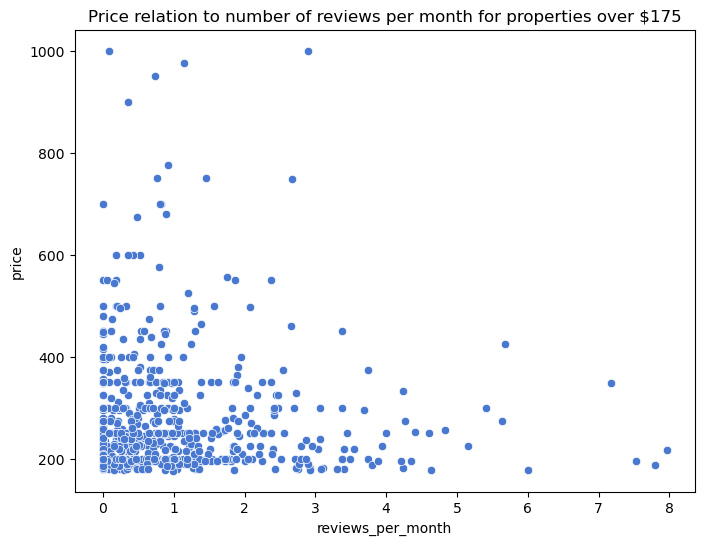

In [43]:
data_filt = lis.loc[(lis['price'] > 175) ]
f, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(data=data_filt,x='reviews_per_month',y='price')
plt.title('Price relation to number of reviews per month for properties over $175')
plt.show()

In [44]:
busiest_hosts = lis.groupby(['host_name','room_type','neighbourhood_group_cleansed'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews',ascending=False).reset_index().head(10)
busiest_hosts

,index,host_name,room_type,neighbourhood_group_cleansed,number_of_reviews
0,723,Dirk & Jaq,Private room,Downtown,474
1,80,Amanda,Entire home/apt,Ballard,404
2,2361,Shalini,Private room,Capitol Hill,353
3,1266,John,Entire home/apt,Capitol Hill,320
4,1581,Lauren,Entire home/apt,Downtown,319
5,1697,Maddy,Entire home/apt,Delridge,297
6,406,Calen,Private room,Capitol Hill,294
7,1495,Kevin & Jennifer,Entire home/apt,Other neighborhoods,287
8,55,Alexia,Private room,Capitol Hill,279
9,2003,Nick,Entire home/apt,Capitol Hill,278


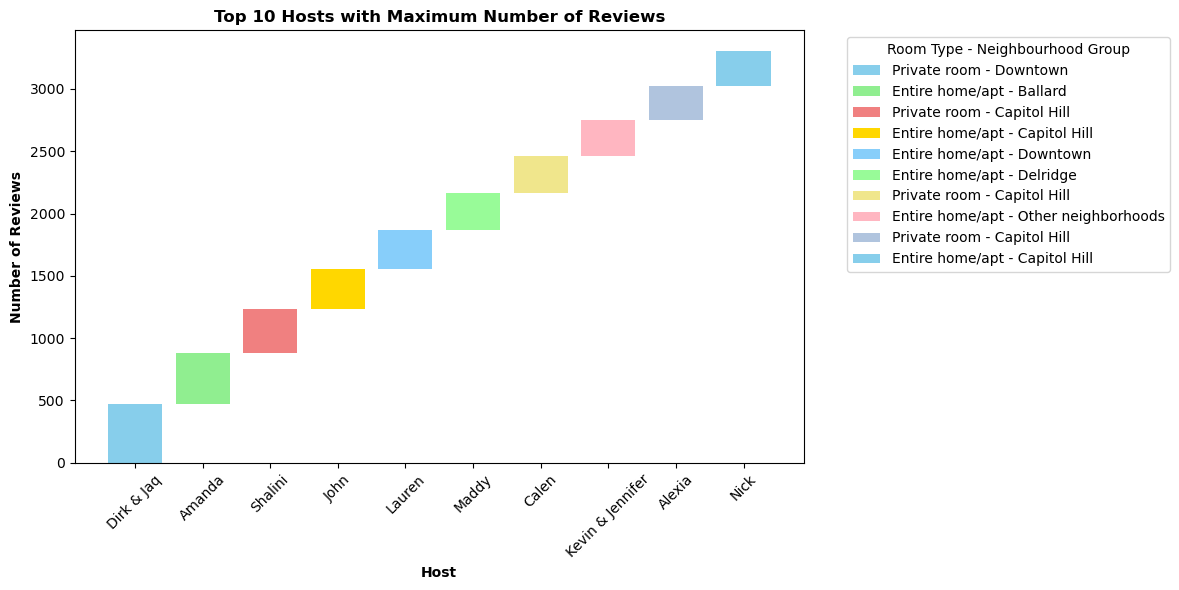

In [92]:
hosts = busiest_hosts['host_name']
room_types = busiest_hosts['room_type']
neighbourhood_groups = busiest_hosts['neighbourhood_group_cleansed']
reviews = busiest_hosts['number_of_reviews']

fig, ax = plt.subplots(figsize=(12, 6))

colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold', 'lightskyblue', 'palegreen', 'khaki', 'lightpink', 'lightsteelblue']

bottom = None
for i in range(len(hosts)):
    ax.bar(hosts[i], reviews[i], color=colors[i % len(colors)], bottom=bottom, label=f'{room_types[i]} - {neighbourhood_groups[i]}')
    if bottom is None:
        bottom = reviews[i]
    else:
        bottom += reviews[i]

plt.xticks(rotation=45)

plt.xlabel('Host', fontweight='bold')
plt.ylabel('Number of Reviews', fontweight='bold')
plt.title('Top 10 Hosts with Maximum Number of Reviews', fontweight='bold')
plt.legend(title='Room Type - Neighbourhood Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()

C:\Users\Zia Saab\AppData\Local\Temp\ipykernel_11044\40890931.py:15: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Number of Reviews')


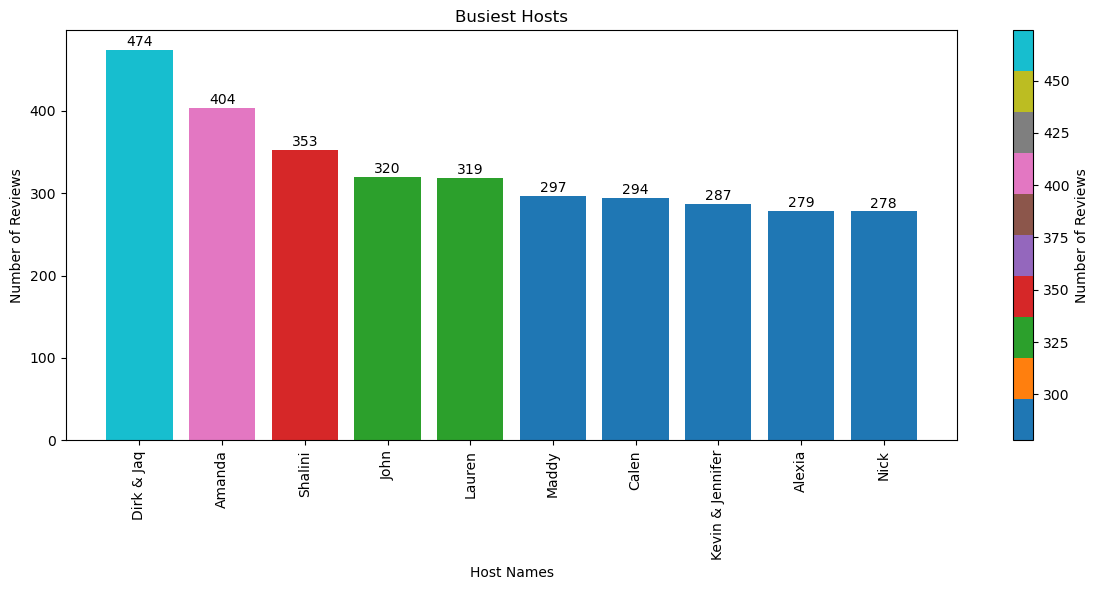

In [54]:
host_name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']

cmap = plt.cm.tab10 

normalize = plt.Normalize(vmin=min(reviews), vmax=max(reviews))
colors = [cmap(normalize(value)) for value in reviews]

plt.figure(figsize=(12, 6))  
ax = plt.bar(host_name, reviews, color=colors)


sm = plt.cm.ScalarMappable(cmap=cmap, norm=normalize)
sm.set_array([])
plt.colorbar(sm, label='Number of Reviews')


plt.title('Busiest Hosts')
plt.xlabel('Host Names')
plt.ylabel('Number of Reviews')


for i in range(len(host_name)):
    plt.text(i, reviews[i] + 1, str(reviews[i]), ha='center', va='bottom')


plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


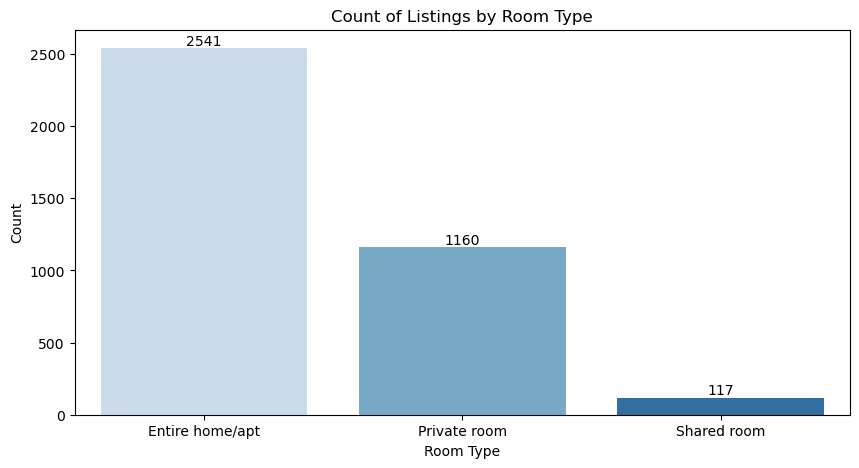

In [71]:
ax = sns.countplot(x='room_type', data=lis, palette='Blues')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Count of Listings by Room Type')

for bars in ax.containers:
    ax.bar_label(bars)
plt.show()


In [72]:
lis.groupby(['neighbourhood','neighbourhood_group_cleansed','room_type'])['number_of_reviews'].max().reset_index().sort_values(by='number_of_reviews',ascending=False).head(10)

,neighbourhood,neighbourhood_group_cleansed,room_type,number_of_reviews
97,International District,Downtown,Private room,474
7,Ballard,Ballard,Entire home/apt,404
244,Stevens,Capitol Hill,Private room,353
135,Montlake,Capitol Hill,Entire home/apt,320
35,Central Business District,Downtown,Entire home/apt,319
236,South Delridge,Delridge,Entire home/apt,297
27,Capitol Hill,Capitol Hill,Private room,294
220,Ravenna,Other neighborhoods,Entire home/apt,287
26,Capitol Hill,Capitol Hill,Entire home/apt,278
8,Ballard,Ballard,Private room,277


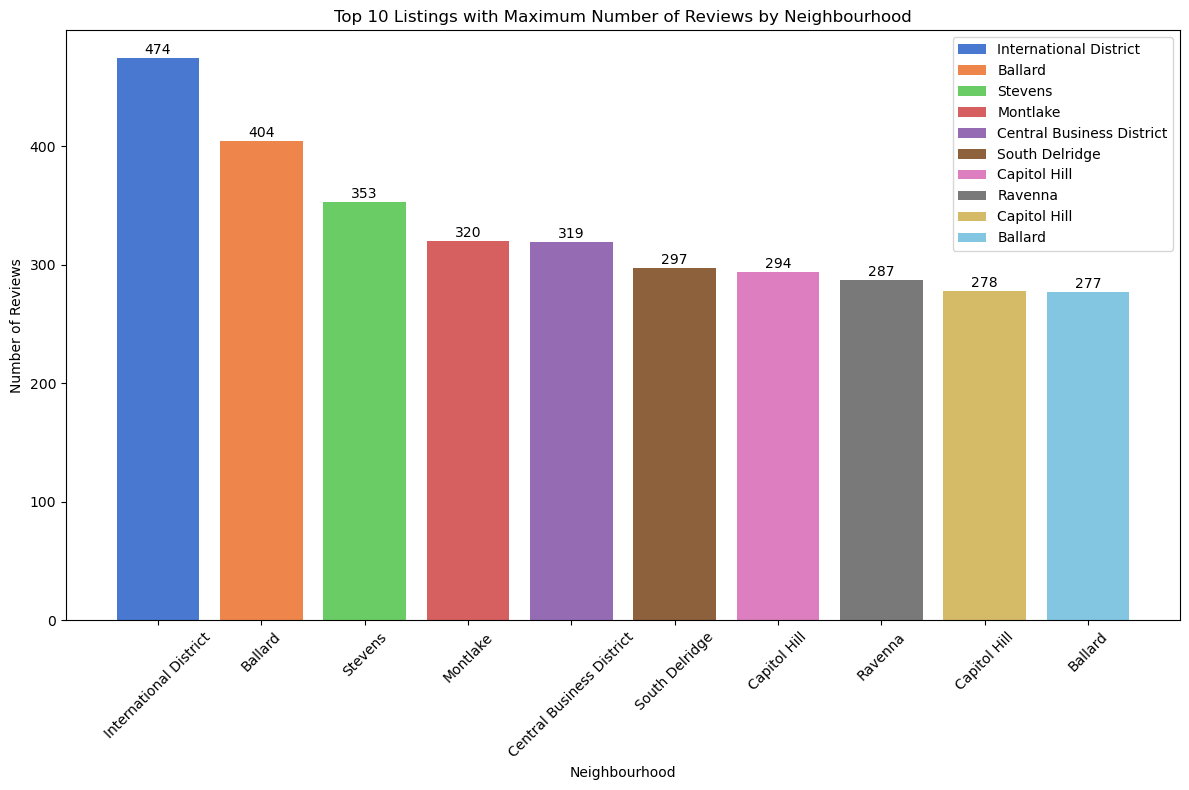

In [96]:
import matplotlib.pyplot as plt

# Extract data
top_listings = lis.groupby(['neighbourhood', 'neighbourhood_group_cleansed', 'room_type'])['number_of_reviews'].max().reset_index().sort_values(by='number_of_reviews', ascending=False).head(10)

# Set up the figure and axes
plt.figure(figsize=(12, 8))

# Plot the grouped bar chart
for i, (neighbourhood, neighbourhood_group, room_type, reviews) in enumerate(zip(top_listings['neighbourhood'], top_listings['neighbourhood_group_cleansed'], top_listings['room_type'], top_listings['number_of_reviews'])):
    plt.bar(i, reviews, label=f'{neighbourhood}')

    # Add count labels above each bar
    plt.text(i, reviews + 1, str(reviews), ha='center', va='bottom')

# Add labels and title
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Reviews')
plt.title('Top 10 Listings with Maximum Number of Reviews by Neighbourhood')

# Customize x-axis ticks and labels
plt.xticks(range(len(top_listings)), top_listings['neighbourhood'], rotation=45)

plt.legend()
plt.tight_layout()
plt.show()


In [73]:
lis.nlargest(5,'price')[['name','neighbourhood','neighbourhood_group_cleansed','host_name','room_type','price']]

,name,neighbourhood,neighbourhood_group_cleansed,host_name,room_type,price
3122,Cute Basement Apartment,Ravenna,Other neighborhoods,Christina,Entire home/apt,1000
1208,100% Walk Score 1-BR Downtown,Belltown,Downtown,Amy,Entire home/apt,999
2,New Modern House-Amazing water view,Queen Anne,Queen Anne,Jill,Entire home/apt,975
3443,Beautiful Home near Downtown,Magnolia,Magnolia,Dan,Entire home/apt,950
1279,Penthouse Suite Top Floor,Belltown,Downtown,Jason,Entire home/apt,899


In [74]:
lis.sort_values(by='price',ascending=False)[['name','neighbourhood','neighbourhood_group_cleansed','host_name','room_type','price']][:10]

,name,neighbourhood,neighbourhood_group_cleansed,host_name,room_type,price
3122,Cute Basement Apartment,Ravenna,Other neighborhoods,Christina,Entire home/apt,1000
1208,100% Walk Score 1-BR Downtown,Belltown,Downtown,Amy,Entire home/apt,999
2,New Modern House-Amazing water view,Queen Anne,Queen Anne,Jill,Entire home/apt,975
3443,Beautiful Home near Downtown,Magnolia,Magnolia,Dan,Entire home/apt,950
1279,Penthouse Suite Top Floor,Belltown,Downtown,Jason,Entire home/apt,899
565,70' Yacht on south Lake Union,Westlake,Cascade,Chuck,Entire home/apt,775
2518,Fabulous Views of Lakes & Mountains,Portage Bay,Capitol Hill,Megan,Entire home/apt,750
2566,2700sqft 4BR Capitol Hill home,Montlake,Capitol Hill,Bojana,Entire home/apt,750
239,"Luxurious, Modern, Panoramic Views",Queen Anne,Queen Anne,David,Entire home/apt,749
19,Grand Craftsman Home on Queen Anne,Queen Anne,Queen Anne,Kary,Entire home/apt,700


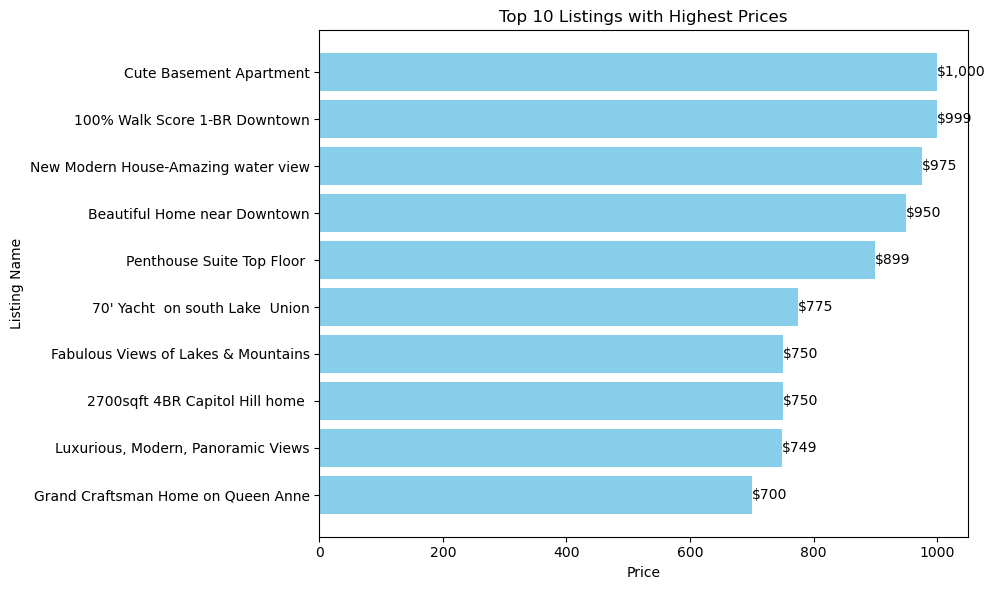

In [113]:
import matplotlib.pyplot as plt

# Extract data
top_listings = lis.sort_values(by='price', ascending=False).head(10)

# Set up the figure and axes
plt.figure(figsize=(10, 6))

# Plot the horizontal bar chart
bars = plt.barh(top_listings['name'], top_listings['price'], color='skyblue')

# Add labels and title
plt.xlabel('Price')
plt.ylabel('Listing Name')
plt.title('Top 10 Listings with Highest Prices')

# Add count labels next to each bar
for i, price in enumerate(top_listings['price']):
    plt.text(price, i, '${:,.0f}'.format(price), va='center')

plt.gca().invert_yaxis()  # Invert y-axis to display the highest price at the top

plt.tight_layout()
plt.show()


In [75]:
lis1 = lis.groupby(['neighbourhood','neighbourhood_group_cleansed'])['price'].mean().reset_index()
top_nhbr = lis1.loc[lis1.groupby(['neighbourhood_group_cleansed'])['price'].idxmax()].sort_values(by='price',ascending=False)
top_nhbr

,neighbourhood,neighbourhood_group_cleansed,price
26,Fairmount Park,West Seattle,370.0
30,Fremont,Ballard,265.0
45,Industrial District,Other neighborhoods,245.0
102,Portage Bay,Capitol Hill,244.166667
14,Capitol Hill,Cascade,225.0
58,Madison Park,Central Area,210.0
111,Roosevelt,University District,199.333333
61,Magnolia,Magnolia,178.113208
99,Pike Place Market,Downtown,175.512821
106,Queen Anne,Queen Anne,169.502732


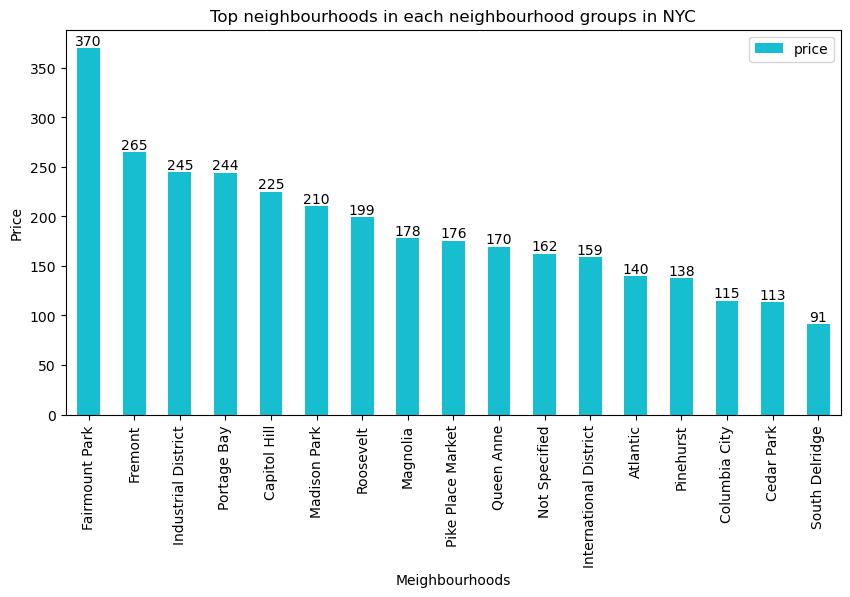

In [87]:
cmap = plt.cm.tab10 

normalize = plt.Normalize(vmin=min(reviews), vmax=max(reviews))
colors = [cmap(normalize(value)) for value in reviews]

ax = top_nhbr.plot.bar(x='neighbourhood',title= 'Top neighbourhoods in each neighbourhood groups in NYC',color=colors)
plt.xlabel('Meighbourhoods')
plt.ylabel('Price')

for bars in ax.containers:
    ax.bar_label(bars,fmt='%.0f')
plt.show()

In [114]:
import folium
from folium.plugins import MarkerCluster

# Extract top 10 hosts by price
top_hosts = lis.groupby('host_name')['price'].mean().nlargest(10).index.tolist()

# Filter listings by top hosts
top_listings = lis[lis['host_name'].isin(top_hosts)]

# Extract relevant columns (latitude and longitude)
locations = top_listings[['latitude', 'longitude']]

# Create a folium map centered around the mean latitude and longitude
m = folium.Map(location=[locations['latitude'].mean(), locations['longitude'].mean()], zoom_start=10)

# Add markers for each location
marker_cluster = MarkerCluster().add_to(m)
for idx, row in locations.iterrows():
    folium.Marker(location=[row['latitude'], row['longitude']]).add_to(marker_cluster)

# Display the map
m.save('top_hosts_map.html')
m
